# PREDICTION OF AUTOMOTIVE ACCIDENT SEVERITY

* GENERAL

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt


from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import os
import csv

In [4]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

* NEURAL NETWORK

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.python.keras import utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

/Users/ewagerus/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

## DATA PREPROCESSING 

In [73]:
df1 = pd.read_csv('data/2014 excel.csv')
df2 = pd.read_csv('data/2015 excel.csv')
df3 = pd.read_csv('data/2016 excel.csv')

In [74]:
#merging files#
frames = [df1, df2, df3]
result = pd.concat(frames, axis=0)

In [75]:
#deleting columns and data#
result= result.drop(['Grid Ref: Northing','Grid Ref: Easting','Reference Number','Expr1','Accident Date','Lighting Conditions','1st Road Class'],axis=1)
result= result.dropna(axis=0)

In [76]:
#listing objects#
list1=['Monday','Tuesday','Wednesday','Thursday']
list2=['Friday','Saturday','Sunday']
list3=['Fine without high winds','Fine with high winds']
list4=['Snowing without high winds','Snowing with high winds']
list5=['Raining without high winds','Raining with high winds']
list6=['Fog or mist']
list7=['Minibus (8 to 16 passenger seats)','Bus or coach (17 or more passenger seats)']
list8=['Goods vehicle 3.5 tonnes mgw and under','Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw','goods','Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw']
list9=['Motorcycle over 50cc and up to 125cc','Motorcycle over 125cc and up to 500cc','M cycle 50cc and under','Motorcycle over 500cc','Motorcycle Unknown CC']
list10=['Car','Taxi or Private hire car']
list11=['Driver', 'Driver ']
list12=['Pedestrian']

In [77]:
#listing day

def b(row):
    if row['Day']in list1:
        val='weekday'
    elif row['Day']in list2:
        val='weekend'
    return val
result['Day'] = result.apply(b, axis=1)


#listing weather conditions#

def e(row):
    if row['Weather Conditions']in list3:
        val='fine'
    elif row['Weather Conditions']in list4:
        val='snowing'
    elif row['Weather Conditions']in list5:
        val='raining'
    elif row['Weather Conditions']in list6:
        val='fog'
    else: 
        val='other'   
    return val
result['Weather Conditions'] = result.apply(e, axis=1)

#listing type of vehicle

def j(row):
    if row['Type of Vehicle']in list7:
        val='bus'
    elif row['Type of Vehicle']in list8:
        val='goods vehicle'
    elif row['Type of Vehicle']in list9:
        val='motorcycle'
    elif row['Type of Vehicle']in list10:
        val='car'
    else: 
        val='other'
    return val
result['Type of Vehicle'] = result.apply(j, axis=1)


#listing Time

def c(row):
    if 600< row['Time (24hr)'] <= 1801:
        val='Day-time'
    else:
        val='Night-time'
    return val
result['Time (24hr)'] = result.apply(c, axis=1)

#listing Casualty Class

def a(row):
    if row['Casualty Class']in list11:
        val='Driver'
    elif row['Casualty Class']in list12:
        val='Pedestrian'
    else: 
        val='Passenger'
    return val
result['Casualty Class'] = result.apply(a, axis=1)

#Dummies
result=pd.get_dummies(result,columns=['Day','Time (24hr)','Road Surface','Weather Conditions','Casualty Class','Sex of Casualty','Type of Vehicle'])

#dealing with columns containing the same information
result = result.drop(['Day_weekday', 'Time (24hr)_Day-time', 'Sex of Casualty_Female'] , axis=1)




## RE-SAMPLING - OVER-SAMPLING THE MINORITY CLASS

In [78]:
result['Casualty Severity'].value_counts()

Slight     6739
Serious     957
Fatal        48
Name: Casualty Severity, dtype: int64

In [79]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [80]:
#dividing into train and test datasets

from sklearn.model_selection import train_test_split
  
X = result.drop('Casualty Severity', axis=1)
y = result['Casualty Severity']

In [81]:
#undersampling 'Slight' class to the 'Serious' class
array = ['Slight', 'Serious']
result_a=result.loc[result['Casualty Severity'].isin(array)]
X_a = result_a.drop('Casualty Severity', axis=1)
y_a = result_a['Casualty Severity']
sm = RandomUnderSampler()
X_a, y_a = sm.fit_sample(X_a, y_a)
label = list(X)
X_a=pd.DataFrame(data = X_a, columns = label)
y_a=pd.DataFrame(data = y_a, columns = ['Casualty Severity'])
result_b=pd.merge(y_a,X_a,right_index=True, left_index=True)
result_c=result.loc[result['Casualty Severity']=='Fatal']
cols=list(result_b)
result_c=result_c[cols]
result_d=pd.concat([result_b,result_c])
result_d['Casualty Severity'].value_counts()

Slight     957
Serious    957
Fatal       48
Name: Casualty Severity, dtype: int64

In [82]:
#oversampling 'Fatal' class to the 'Serious' class
array = ['Fatal', 'Serious']
result_e=result_d.loc[result_d['Casualty Severity'].isin(array)]
X_e = result_e.drop('Casualty Severity', axis=1)
y_e = result_e['Casualty Severity']
sm = SMOTE()
X_e, y_e = sm.fit_sample(X_e, y_e)
X_d = result_d.drop('Casualty Severity', axis=1)
label = list(X_d)
X_e=pd.DataFrame(data = X_e, columns = label)
y_e=pd.DataFrame(data = y_e, columns = ['Casualty Severity'])
result_f=pd.merge(y_e,X_e,right_index=True, left_index=True)
result_g=result_d.loc[result_d['Casualty Severity']=='Slight']
cols=list(result_f)
result_g=result_g[cols]
result_h=pd.concat([result_f,result_g])
result_h['Casualty Severity'].value_counts()

Slight     957
Fatal      957
Serious    957
Name: Casualty Severity, dtype: int64

In [83]:
#dividing into train and test datasets

from sklearn.model_selection import train_test_split
  
X = result_h.drop('Casualty Severity', axis=1)
y = result_h['Casualty Severity']

result=result_h

## DECISION TREE

In [71]:
seed=12345
np.random.seed(seed)

In [143]:
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier 

45.98836375760606
53.91189464032675
50.220488455447196
53.82602317245977
54.71247811952987
57.07601900475119
58.39493206634992
62.47320163374177
62.991114445277994
65.45691422855714
66.49025589730766
67.76855880636826
69.12464782862382
71.216570809369
71.6943402517296
71.84947903642576
73.08880553471703
72.8565307993665
73.60536800866883
73.9278319579895
74.01858798032842
74.19919979995
74.61235308827206
74.32818204551138
74.43162457280988
74.45748103692591
74.36697507710261
74.37992831541219
74.40576810869383
74.30239226473286
74.3282320580145
74.28947236809202
74.2765524714512
74.26363257481037
74.26363257481037
74.26363257481037
74.26363257481037
74.26363257481037
74.26363257481037


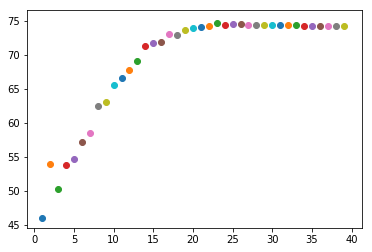

In [201]:
for i in range(1,40):
    tree = DecisionTreeClassifier(criterion='gini',max_depth=i ,random_state=1, class_weight='balanced')  
    tree .fit(X, y) 
    y_pred =tree .predict(X)
    kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
    score = cross_val_score(tree, X, y, cv=kfold)
    mean=score.mean()*100
    plt.scatter(i, mean)
    print(mean)
plt.show()

In [146]:
from sklearn.tree import DecisionTreeClassifier  
tree = DecisionTreeClassifier(criterion='gini',max_depth=10,random_state=1)  
tree.fit(X, y) 
y_pred=tree.predict(X)

In [26]:
#defining the model evaluation procedure
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

In [148]:
score = cross_val_score(tree, X, y, cv=kfold)
print("mean accuracy %.2f%% (standard deviation %.2f%%)" % (score.mean()*100, score.std()*100))
#The results are summarized as both the mean and standard deviation of the model accuracy on the dataset. 

mean accuracy 75.37% (standard deviation 1.61%)


In [149]:
importance = tree.feature_importances_
column_names = X.columns.values.tolist()
importances = dict(zip(importance, column_names))

important_features = []

for ii in range(len(importance)):
    if ii < 3:
        important_features.append(importances[sorted(importance, reverse = True)[ii]])
        
print('The 3 most important features in decision tree model are: '+str(important_features))


The 3 most important features in decision tree model are: ['Road Surface_Wet or Damp', 'Age of Casualty', 'Casualty Class_Pedestrian']


In [150]:
#Plotting decision tree

dot_data = export_graphviz(tree,
                            filled=True, 
                            rounded=True,
                            out_file=None,
                            feature_names=list(X))  

graph=graph_from_dot_data(dot_data)

graph.write_png('tree.png')

from IPython.display import Image
Image('tree.png', width=1000)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


## STANDARDIZATION AND PCA ANALYSIS

In [19]:
#standardization 
stdsc = StandardScaler()
X_1 = stdsc.fit_transform(X)

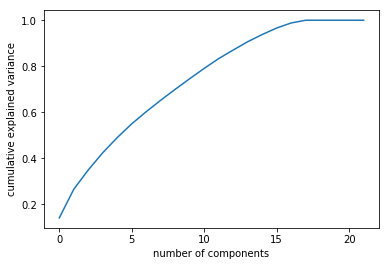

In [20]:
#choosing the number of components for PCA
pca = PCA().fit(X_1.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
#the first 15 components contain approximately 90% of the variance

In [21]:
#PCA
pca = PCA(n_components=12)
X_2 = pca.fit_transform(X_1)

## NEURAL NETWORK

In [39]:
#one hot encoding
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)

# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = utils.np_utils.to_categorical(encoded_y)

NameError: name 'LabelEncoder' is not defined

In [47]:
# define baseline model
def baseline_model():
    model = Sequential()
    model.add(Dense(30, input_dim=15, activation='relu'))
    model.add(Dense(15, input_dim=30, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

#“relu” activation function reduces likelihood of vanishing gradient
#using a “softmax” activation function ensuring that the output values are in the range of 0 and 1 and may be used as predicted probabilities
#when using the "categorical_crossentropy" loss, your targets should be in categorical format (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except for a 1 at the index corresponding to the class of the sample) 
#"Adam" optimizer realizes the benefits of both AdaGrad (Adaptive Gradient Algorithm) and RMSProp (Root Mean Square Propagation)

In [48]:
#define classifier
estimator = KerasClassifier(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)
#batch defines the number of samples to work through before updating the internal model parameters
#epoch defines the number of times that the learning algorithm will work through the entire training dataset
#verbose is a general programming term for produce lots of logging output; set to 0 (silent) not to slower the computation

In [50]:
#calculating results
results = cross_val_score(estimator, X_2, dummy_y, cv=kfold)

In [51]:
print("mean accuracy %.2f%% (standard deviation %.2f%%)" % (results.mean()*100, results.std()*100))
#The results are summarized as both the mean and standard deviation of the model accuracy on the dataset. 

mean accuracy 85.83% (standard deviation 1.16%)


## KNN

71.78571428571429
71.57725996902826
71.99610433604337
72.58759194734805
73.21476964769647
73.18016840882693
73.21525358110725
72.7269647696477
72.13511420828496
71.40304394115371
71.71711672473869
70.49845141308556
70.95105013550136
70.25382307394501


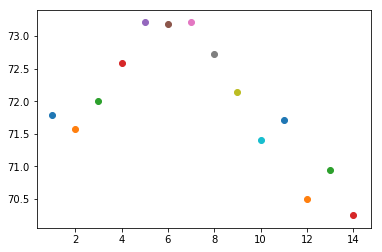

In [156]:
from sklearn.neighbors import KNeighborsClassifier


for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i, p=2,
                               metric='minkowski')
    knn.fit(X_2, y)
    results3 = cross_val_score(knn, X_2, y, cv=kfold)
    mean=results3.mean()*100
    plt.scatter(i, mean)
    print(mean)
plt.show()

In [157]:
knn = KNeighborsClassifier(n_neighbors=7, p=2,
                               metric='minkowski')
knn.fit(X_2, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [158]:
results3 = cross_val_score(knn, X_2, y, cv=kfold)

In [159]:
print("mean accuracy %.2f%% (standard deviation %.2f%%)" % (results3.mean()*100, results3.std()*100))
#The results are summarized as both the mean and standard deviation of the model accuracy on the dataset. 

mean accuracy 73.22% (standard deviation 2.51%)


## LOGISTIC REGRESSION

* using PCA

In [22]:
lr = LogisticRegression(C=100, random_state=1)
#the term C is directly related to the regularization parameter λ
lr.fit(X_2, y)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
results1 = cross_val_score(lr, X_2, y, cv=kfold)

In [28]:
print("mean accuracy %.2f%% (standard deviation %.2f%%)" % (results1.mean()*100, results1.std()*100))
#The results are summarized as both the mean and standard deviation of the model accuracy on the dataset. 

mean accuracy 53.88% (standard deviation 2.96%)


* without PCA

In [29]:
X_3 = X.drop(['Road Surface_Dry', 'Weather Conditions_fine', 'Casualty Class_Driver', 'Type of Vehicle_other'], axis=1)

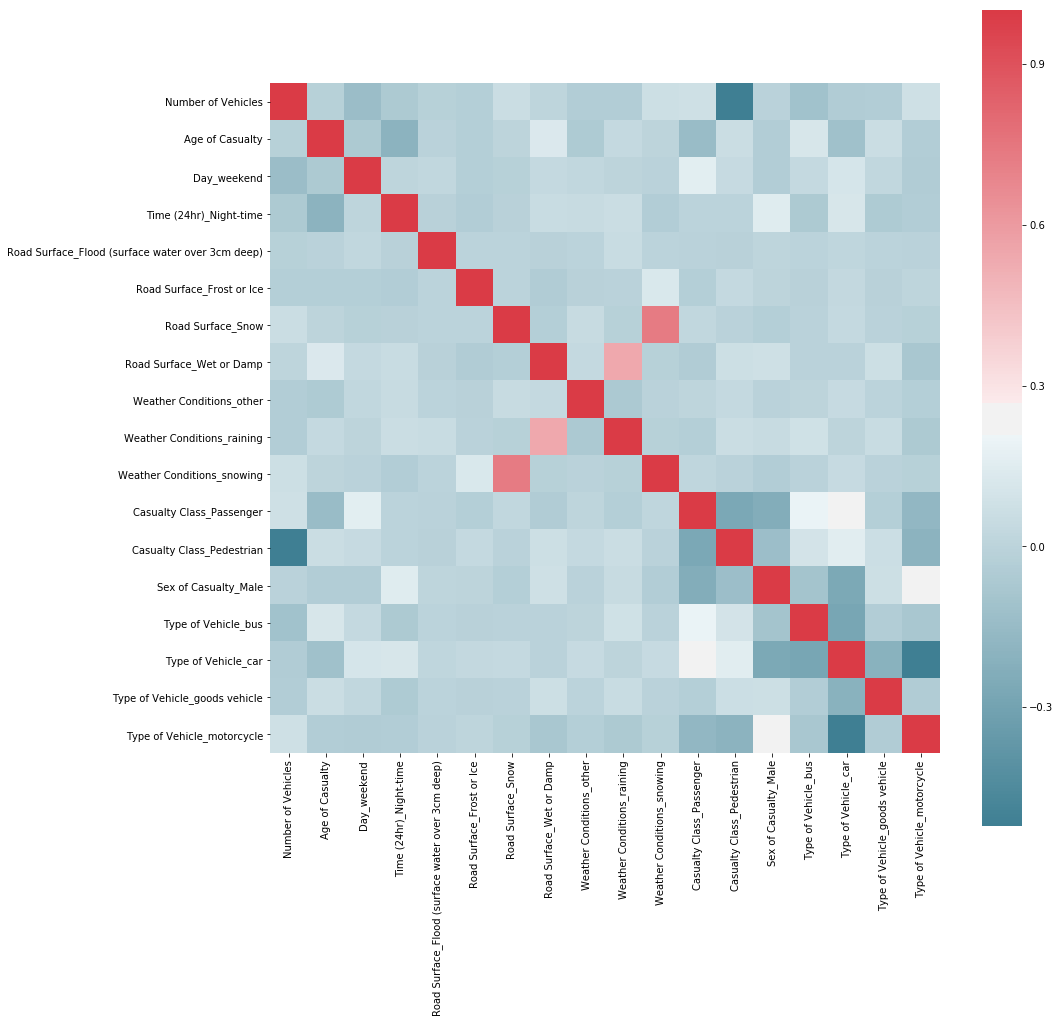

In [30]:
import seaborn as sns

f, ax = plt.subplots(figsize=(15, 15))
corr = X_3.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

plt.show()

In [31]:
X_4 = X_3.drop(['Weather Conditions_other',
 'Weather Conditions_raining',
 'Weather Conditions_snowing'], axis=1)

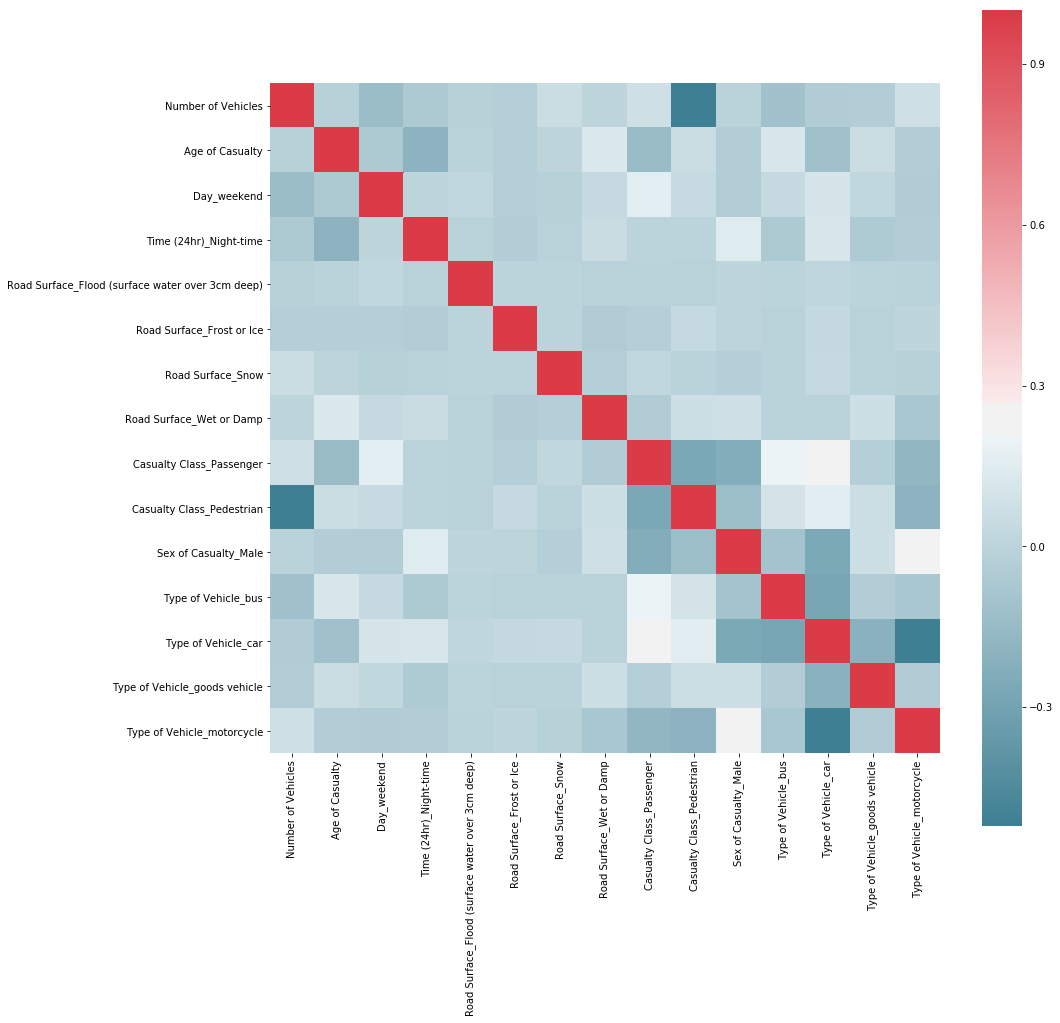

In [32]:
import seaborn as sns

f, ax = plt.subplots(figsize=(15, 15))
corr = X_4.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

plt.show()

In [33]:
lr = LogisticRegression(C=100, random_state=1)
#the term C is directly related to the regularization parameter λ
lr.fit(X_4, y)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
results2 = cross_val_score(lr, X_4, y, cv=kfold)

In [35]:
print("mean accuracy %.2f%% (standard deviation %.2f%%)" % (results2.mean()*100, results2.std()*100))
#The results are summarized as both the mean and standard deviation of the model accuracy on the dataset. 

mean accuracy 56.46% (standard deviation 2.48%)


In [36]:
from IPython.display import HTML, display
import tabulate
coef = lr.coef_[0]
table = [coef]
display(HTML(tabulate.tabulate(table, headers=list(X_4), tablefmt='html')))

Number of Vehicles,Age of Casualty,Day_weekend,Time (24hr)_Night-time,Road Surface_Flood (surface water over 3cm deep),Road Surface_Frost or Ice,Road Surface_Snow,Road Surface_Wet or Damp,Casualty Class_Passenger,Casualty Class_Pedestrian,Sex of Casualty_Male,Type of Vehicle_bus,Type of Vehicle_car,Type of Vehicle_goods vehicle,Type of Vehicle_motorcycle
-0.590927,0.0230135,0.0199518,0.777241,-1.8059,-4.14423,-2.4917,0.860203,0.147155,0.342886,1.17325,-1.14162,-0.305722,-0.238982,-0.0422686


## SUMMARY 

In [186]:
table = [["Random Tree",round(score.mean()*100,2),round(score.std()*100,2)],
         ["Neural Network","results.mean()*100","results.std()*100"],
         ["KNN",round(results3.mean()*100,2) , round(results3.std()*100,2)],
         ["Logistic Regression with PCA", round(results1.mean()*100,2) , round(results1.std()*100,2)],
         ["Logistic Regression without PCA", round(results2.mean()*100,2) , round(results2.std()*100,2)]]
display(HTML(tabulate.tabulate(table, headers=["Algorithm","Mean Accuracy", "Standard Deviation"], tablefmt='html')))

Algorithm,Mean Accuracy,Standard Deviation
Random Tree,75.37,1.61
Neural Network,results.mean()*100,results.std()*100
KNN,73.22,2.51
Logistic Regression with PCA,50.16,2.81
Logistic Regression without PCA,54.55,1.58


In [84]:
result['Road Surface_Dry'].value_counts()

1.000000    1700
0.000000     744
0.037855       1
0.615563       1
0.095652       1
0.203426       1
0.923845       1
0.124906       1
0.665751       1
0.917838       1
0.637253       1
0.205997       1
0.280766       1
0.910304       1
0.628902       1
0.300726       1
0.729407       1
0.724346       1
0.565242       1
0.974007       1
0.115871       1
0.480553       1
0.215337       1
0.764995       1
0.921946       1
0.677729       1
0.302836       1
0.885769       1
0.511158       1
0.488033       1
            ... 
0.241872       1
0.299365       1
0.780017       1
0.432580       1
0.851371       1
0.907019       1
0.086374       1
0.785648       1
0.709564       1
0.856172       1
0.800108       1
0.013582       1
0.894250       1
0.996686       1
0.627321       1
0.303165       1
0.775465       1
0.790492       1
0.946567       1
0.780486       1
0.467232       1
0.123569       1
0.818061       1
0.013930       1
0.601634       1
0.538581       1
0.034592       1
0.967113      